In [1]:
import pandas as pd

In [2]:
lcn = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Linear\LungCapData.csv")

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
lcn.shape

(725, 6)

In [5]:
# Steps involved in model building
# 1. Problem Statement (is to build a predictive model which can predict the LungCap of person)
# 2. Data collection
# 3. Data cleaning/pre processing/preparation
 # check for nulls, convert labels to numeric, rename the columns, add columns if needed
# 4. RANDOM Sampling (Train and Test) ratio (Large portion in your train, smaller in test 80:20, 70:30, 75:25)
# 5. Model building
  # a. Import the required function from sklearn
  # b. create the object / Instance 
  # c. Run your fit method and pass x & y. At this point model is build
  # d. Predict function is used for prediction and while using the predict we only need 'x'.
# 6. Testing (to evaluate the model / to judge the performance of the model)

In [6]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [7]:
# We can use both label encoder and replace function to convert labels to numeric
# Using replace function here

lcn.Smoke = lcn.Smoke.replace({'no': 0, 'yes' : 1})
lcn.Caesarean = lcn.Caesarean.replace({'no': 0, 'yes' : 1})
lcn.Gender = lcn.Gender.replace({'male': 0, 'female' : 1})

In [8]:
lcn.head()

# Just to check that the entire data are in numeric format

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [9]:
# Here we put lcn = df1 after removing the outliers and then run from below program again

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
lcn_train , lcn_test = train_test_split(lcn, test_size = .2)

# train_test_split is a built in function for random sampling
# test_size = .2 indicates 20% test data

In [12]:
lcn_train.shape

(580, 6)

In [13]:
lcn_test.shape

(145, 6)

In [14]:
lcn_train_x = lcn_train.iloc[: ,1:: ]
lcn_train_y = lcn_train.iloc[: , 0]


# or we can also write as
# lcn_train_x = lcn_train.drop(['LungCap'])
# lcn_train_y = lcn_train.LungCap

In [15]:
lcn_test_x = lcn_test.iloc[: ,1:: ]
lcn_test_y = lcn_test.iloc[: , 0]

In [16]:
lcn_train_x.head(1)

# Just to verify

,Age,Height,Smoke,Gender,Caesarean
213,15,66.4,0,1,0


In [17]:
lcn_test_x.head(1)

# Just to verify

,Age,Height,Smoke,Gender,Caesarean
698,15,67.3,1,1,0


In [18]:
lcn_train_y.head(1)

# Just to verify

213    9.4
Name: LungCap, dtype: float64

In [19]:
lcn_test_y.head(1)

# Just to verify

698    7.95
Name: LungCap, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreg = LinearRegression()

# linreg is just a variable name, can use any name

In [22]:
linreg.fit(lcn_train_y, lcn_train_x)

# The error comes because the function expects 'x' to come first
# Also 'x' can take many values while 'y' can take only one value


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.4    7.85   9.9    7.825 12.95   8.575  7.5    7.325 11.225  8.525
 10.425  2.65   4.475  6.7    7.55  10.925  8.575 11.575 10.875 10.2
 10.1    9.7    6.05  12.05   6.325  8.7    5.025  9.7    9.1    9.55
 12.2    5.075  9.5    4.625  6.2   10.125  9.75   1.85  10.475  3.175
  6.45  10.775  6.225 12.4    7.825  8.775  5.35   9.525  7.     4.725
 13.375  7.475 11.7    8.45   1.925 12.95  11.95   8.85  10.925  4.425
  3.45  10.9    6.225  2.875 11.8    8.2    6.525 11.3    7.625 11.225
  2.625  3.4    7.85  11.4    8.     7.375  7.975  6.575  8.075  8.
  6.85   6.6    7.775  6.725  6.95   5.375  2.725  9.625 10.725  4.625
  5.7    5.15   6.7    8.35   7.55   8.9    2.25   9.175  9.375  4.975
  9.025  8.775  6.225  8.275  9.025  5.2   10.275  5.875  9.85   8.25
  6.975  8.     5.325  7.35  10.6    6.25  12.375 10.475  6.15   7.125
 11.9    7.7   10.9    0.507  8.05  10.525  7.275  9.675  5.55   2.925
  6.85   3.9   11.65   6.1    8.725 12.325 11.625  2.725  9.925 11.125
  7.75   6.075  8.8    6.85   4.425  9.225 11.275  9.625  6.325  4.525
 10.475  7.65   9.55   7.175  9.65   5.825 10.7    1.325  7.55   9.675
  8.225  8.775  4.625 10.675  9.6   10.2    9.1    5.25   6.1   13.1
  6.8    7.4    7.65   7.35   8.425 11.55  13.375  5.375  6.975 10.8
  7.325  6.8    8.125  3.7    6.7   10.675  8.6    5.05   1.675 10.375
  7.825  5.725  9.675 11.5    4.7    4.475  8.3   14.675  8.85   7.725
  6.175  8.65   4.45   6.7    8.825  2.025  6.1    5.225  7.65   6.925
  8.025  5.875  9.125 11.875  6.     2.625  9.     4.5   10.975  4.9
  6.05   8.625  8.025  6.45   5.175 10.475  8.225  8.775  5.95   7.975
  9.1    8.825  9.875  6.15   6.75   6.175 13.2    4.2    4.775  5.65
  6.825  9.35   9.275  1.9    2.25   6.575 13.375  6.275  8.625 10.025
  8.825  8.5    6.65   6.475  6.95   2.375  6.475  6.925  6.7    7.2
 10.6    7.95   6.3    7.425 10.275 11.125  8.55   6.125  7.675  7.8
  6.125  6.15   7.25   7.575  6.5    8.425 12.05   7.375 11.325 10.05
 10.125  9.2    1.175  5.95   6.525  8.875  9.525  7.825 11.175  5.05
 11.325  7.35   2.25   5.95   8.725  9.725 10.2    6.65  10.75   9.325
  7.475  8.35   8.975  7.8   13.325  3.85   1.575  9.025  3.975  7.475
 10.7    6.05   8.2    8.225  7.025  5.85   1.025  8.375  8.975  8.65
 12.325  8.35  13.875  7.675  9.95   5.725  6.725  4.25   8.85   3.825
 10.3    9.475 11.8    5.475  5.025  9.675 10.7    2.475 14.55   9.85
 10.625  6.4    7.225 10.025  4.55   8.775  4.85   3.925  7.4   12.925
  4.325  9.45   6.3    4.075  6.2   10.55   6.575 12.15   6.45  10.45
  5.775  6.05   9.85   1.125  8.35   8.55   8.075  4.575  8.475  5.85
 11.075 10.     6.85   8.35   8.8   10.2   11.575 13.025  3.975  3.425
  7.55   6.625  7.7    7.4    4.2    5.225  8.25  11.05   3.25   9.
  9.95   5.675  5.025  8.5    7.9   10.325  9.2   10.4    5.275  3.675
  9.475  5.25   4.35   8.9    8.2    9.825  4.325  8.25  12.5   10.85
  7.4    9.45   5.875  8.425  6.075 13.075  9.9    6.9    7.25   7.425
  2.725  7.3    8.975  9.275  5.15   8.7    1.45   2.65  11.225  9.925
  7.45   3.75   5.15   6.625  9.325  8.625 10.825  9.975  8.175  4.45
  2.875 10.45   9.1   12.9   12.625  8.6    6.95   2.95   8.7   11.025
  7.1    6.55   7.15   8.425  2.55   7.875  5.625  9.05   6.425 10.175
  7.325  6.825  8.125 12.225 10.35   3.9   11.75   7.625 13.05   8.225
 12.15   7.45   3.675  7.225 11.225  4.875  7.925  9.05   8.1    7.55
 10.6    7.825  3.425 11.025  9.675  9.225  8.6   10.25   9.475  7.275
  3.625  8.025  3.1    7.925  9.8   11.525  9.275  7.825  7.45   7.475
 11.5    4.325  9.625  2.925  5.375  7.35   6.125  8.6    6.075 10.575
 10.025  5.05   2.825 10.425 10.6   11.7   12.425  8.325  8.925  6.45
 10.875  5.3    7.275  5.65   9.725  4.425 10.5    9.75   9.375  6.9
  8.025  2.    12.125 10.65   8.875  8.8    6.375  1.625  7.9    8.725
 12.425 11.075  4.85   6.75   8.     6.45   4.725  9.15  12.275  3.9
  6.725 11.875  4.975  8.675 11.225  7.05  10.4   12.225  7.3    8.725
  9.15   9.2    8.35   6.675  8.55  11.825  2.85  11.775 10.175  5.85
  6.9    7.95  10.05   1.775  9.875  7.825  6.775 11.4   11.075  9.925].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
linreg.fit(lcn_train_x, lcn_train_y)

# Model has been created
# This is the final checkpoint, where if no error comes then model has been created successfully

LinearRegression()

In [24]:
# Lets find the Rsquare
# Formula for Rsquare is mentioned below

linreg.score(lcn_train_x, lcn_train_y)

0.862573695825055

In [25]:
Rsquare = linreg.score(lcn_train_x, lcn_train_y)

# Storing the Rsquare value

In [26]:
# Adjusted Rsquare

# AdjRsquare = 1 - (1 - Rsquare) * (N-1) / (N-K-1)
# N = number of rows in my train data
# K = number of columns in my train_x data

In [27]:
lcn_train_x.shape

(580, 5)

In [28]:
lcn_train_x.shape[0]

580

In [29]:
lcn_train_x.shape[1]

5

In [30]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

# Do not put the exact value N = 580 and K = 5, as if we change the size of train and test data , then N and K will also change

In [31]:
# Adjusted Rsquare

AdjRsquare = 1 - (1 - Rsquare) * (N-1) / (N-K-1)


# Always check Adjusted Rsquare value to be lesser than Rsquare

In [32]:
AdjRsquare

0.861376602583113

In [33]:
linreg.intercept_

# Intercept of my Regression model

-11.188427289955914

In [34]:
linreg.coef_

# Value of respective coefficient

array([ 0.15802984,  0.26879036, -0.44935387, -0.50047093, -0.17979085])

In [35]:
lcn_train_x.head(1)


,Age,Height,Smoke,Gender,Caesarean
213,15,66.4,0,1,0


In [36]:
-10.509 + 15*0.16931367 + 65.8*0.25566737 - 1*0.39551952 

# done the predictio manually just for understanding

8.458098475999998

In [37]:
linreg.predict(lcn_train_x)

# This will do the prediction for all 580 records in your train data

array([ 8.52922916,  9.35923489,  8.36795494,  8.10702935, 11.63047782,
        8.2604388 ,  8.92542832,  8.37394606, 10.90798822,  7.7842059 ,
       10.15861959,  3.60944155,  3.7169577 ,  6.93380987,  8.16540251,
       12.51424162,  9.19609233, 12.33307475, 11.04024003, 10.2825855 ,
       10.94185363, 10.01032287,  6.41551845, 10.90474385,  7.41328714,
        7.80349519,  4.99092955,  8.09916459,  8.9598971 ,  9.39447633,
       10.7203326 ,  6.99987086,  7.59120965,  3.86620402,  7.02999427,
       10.78492479, 10.97010869,  2.96110032, 10.11509227,  4.36529892,
        8.7652551 , 10.40614657,  7.302029  , 13.64316113,  8.17101817,
        7.62293168,  4.91303919,  7.75435752,  8.47497346,  7.97125815,
       11.9548999 ,  7.90402496, 10.79722771,  8.36421294,  2.50365908,
       13.03006133,  9.95332042,  9.70167599, 10.77034867,  5.28934569,
        5.9099348 ,  9.90468038,  6.25534523,  4.33467789, 10.12158101,
        8.02826059,  6.86921768, 10.9918697 ,  9.14370498, 10.62

In [38]:
linreg.predict(lcn_test_x)

# Prediction for test data

array([ 8.32178661,  7.70895654,  9.91995264,  7.35952907, 10.88110919,
        6.6541854 , 10.68646719,  4.89589327,  6.28761201, 10.00757612,
        6.20373053,  7.77287415,  8.42358667, 10.62178222, 10.53602709,
       11.20690199,  8.85452433, 11.50306901,  7.43692181,  9.68178332,
        4.33193115, 11.39505524,  3.15249794,  5.74167421,  6.01183528,
        5.00016504,  5.69627323, 10.44275872,  9.12568597,  9.35983826,
        9.92045027,  6.94661042, 10.00169075,  9.84954628,  8.1363801 ,
        7.37991936,  6.32609782,  6.51330148,  8.6451077 ,  9.83470045,
        6.84745667,  7.00498889,  9.73417068,  9.09880693,  5.45710865,
       10.37552553, 10.33122555,  4.40558188,  9.17757039,  9.39909142,
        7.59555502,  7.79096967, 11.50818704,  5.66061067,  8.31419687,
       11.69259829,  6.45163297,  4.62947419,  5.51136435,  3.92175924,
        8.66686871,  9.86080682,  5.29957643, 11.33805279,  8.85177759,
       10.16186396, 10.81070282, 11.58882414, 11.19162972,  6.26

In [39]:
# Error
# MSE, RMSE, MAE, MAPE
# Plot the error terms

In [40]:
pred_train = linreg.predict(lcn_train_x) # train
pred_test = linreg.predict(lcn_test_x) # test

In [41]:
err_train = lcn_train_y - pred_train
err_test = lcn_test_y - pred_test

In [42]:
err_train

213    0.870771
646   -1.509235
518    1.532045
59    -0.282029
48     1.319522
         ...   
14     0.983159
318   -1.266665
293    0.166219
384    1.242173
714    0.727039
Name: LungCap, Length: 580, dtype: float64

# Lets check some assumption in our linear regression

In [43]:
import numpy as np

In [44]:
np.mean(err_train)

# This mean is zero
# Mean of the errors should be close to zero, is our 1st assumption

3.773226941622601e-15

In [45]:
# Error terms are normally distributed
# Create histogram to check if error are normally distributed

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  2.,  13.,  41.,  97., 120., 132., 109.,  50.,  12.,   4.]),
 array([-3.24625815, -2.60870829, -1.97115843, -1.33360856, -0.6960587 ,
        -0.05850884,  0.57904102,  1.21659089,  1.85414075,  2.49169061,
         3.12924047]),
 <BarContainer object of 10 artists>)

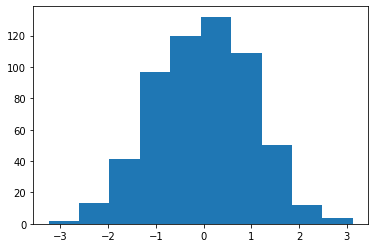

In [47]:
plt.hist(err_train)

(array([ 1.,  1.,  3., 10., 15., 26., 37., 60., 53., 67., 64., 68., 65.,
        44., 35., 15.,  9.,  3.,  3.,  1.]),
 array([-3.24625815, -2.92748322, -2.60870829, -2.28993336, -1.97115843,
        -1.65238349, -1.33360856, -1.01483363, -0.6960587 , -0.37728377,
        -0.05850884,  0.26026609,  0.57904102,  0.89781596,  1.21659089,
         1.53536582,  1.85414075,  2.17291568,  2.49169061,  2.81046554,
         3.12924047]),
 <BarContainer object of 20 artists>)

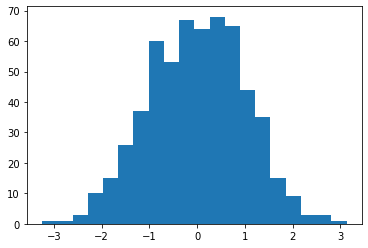

In [48]:
# or
plt.hist(err_train, bins =20)
# errors are normally distributed as seen in the histogram

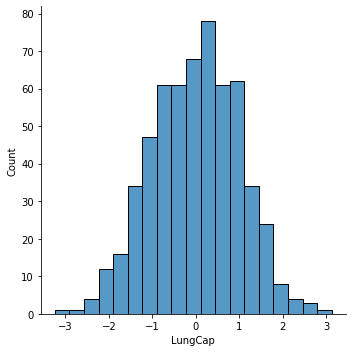

In [49]:
sns.displot(err_train)

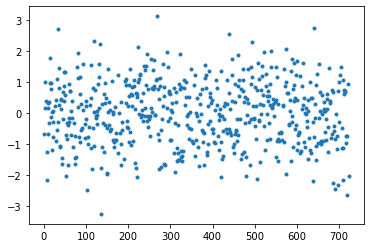

In [50]:
plt.plot(err_train, '.')

# No pattern in error plots, hence assumption is correct

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LungCap'>

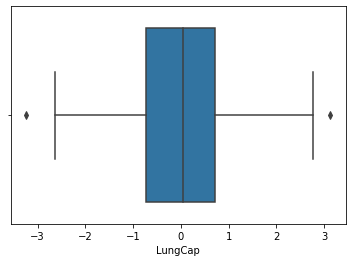

In [51]:
sns.boxplot(err_train)
# Checking the outlier
# 2 outliers is seen in the below graph
# When you build your model for the first time, you check and remove the outliers from the entire original data and not just from test or train data

In [52]:
np.min(err_train)

-3.2462581498197824

In [53]:
np.max(err_train)

3.129240473988931

In [54]:
pred_actual = pd.DataFrame()
pred_actual['Actual'] = lcn_train_y
pred_actual['Predicted'] = pred_train

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

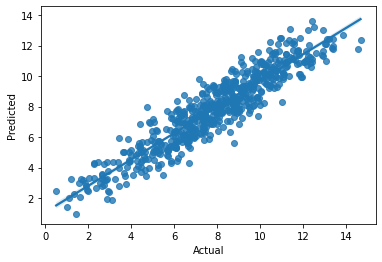

In [55]:
sns.regplot(pred_actual.Actual, pred_actual.Predicted)

# Actual is plotted on X and Predicted on Y because Actual is independent on Predicted value but the vice-versa is not true

In [56]:
# Hence from the above graph, we see that the variance is same throughout and satisfy the 4th assumption of Homosedacity
# Assumptions are checked only on Train data and not on test data because test data was not used in model building

In [57]:
# Lets evaluate the model in test data
# MSE
# RMSE
# MAE
# MAPE

In [58]:
MSE_test = np.mean(np.square(err_test))
MSE_test

1.1591930026174966

In [59]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

1.0766582571166659

In [60]:
MAE_test = np.mean(np.absolute(err_test))
MAE_test

0.8632509803562589

In [61]:
MAPE_test = np.mean(np.absolute((err_test * 100)/lcn_test_y))
MAPE_test

12.378123934352976

In [62]:
Accuracy_test = 100 - MAPE_test
Accuracy_test

87.62187606564703

In [63]:
# Property of Normal Distribution
# 1. Mean = Median = Mode
# 2. Skewness = zero
# 3. Graph is symmetrical around mean
# 4. 1 standard deviation is 67%, 2 standard deviation is 95%, 3 standard deviation is 99.7% data


# You can remove the outliers in 2 ways
# 1. If you remove the data 2 standard deviation from mean
# 2. If you only take the data upto 2 standard deviation from mean



In [64]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1 # Output dataframe which will have data after removinf the outliers
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == >" , df.shape[0] - df1.shape[0])

In [65]:
remove_outliers(lcn,'LungCap',2) # calling the program

(695, 6)
Number of outliers removed == > 30


In [66]:
df1.shape

(695, 6)

In [67]:
# Consider after building model for the first time and when you checked the assumptions
# You got to know that there are outliers and using the above program you remove the outliers

# And now you want to run your model once again using the data which does not has outliers(df1)
# But I dont want to make any major changes in the program as well( the way I build the model )

In [68]:
lcn = df1

# Now run from sklearn.model_selection import train_test_split
# Outliers may appear again , even after this process, but we need to check how far are the outliers from the range and if it has to be removed or not

# ISIN Function

In [69]:
# ISIN function

rahul_df = pd.DataFrame({'Names' : ('Rahul', 'Poonam', 'Tejas', 'Sunil', 'Priyanka', 'Prerna'),
                        'Salary' : ( 100, 200, 300, 200, 500, 150)})

# Assume you have thousands of data 

In [70]:
rahul_df

,Names,Salary
0,Rahul,100
1,Poonam,200
2,Tejas,300
3,Sunil,200
4,Priyanka,500
5,Prerna,150


In [71]:
# your requirement is to select data with salary of Rahul, Poonam, Tejas
l1 = ['Rahul', 'Poonam', 'Tejas']

In [72]:
rahul_df[rahul_df.Names.isin(l1)]

,Names,Salary
0,Rahul,100
1,Poonam,200
2,Tejas,300


In [73]:
rahul_df.loc[rahul_df.Names.isin(l1)]

# It gives same output. Loc is just for the location

,Names,Salary
0,Rahul,100
1,Poonam,200
2,Tejas,300
